# Investigate variations of network parameters on overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys


# add path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
# parent_dir = os.path.dirname(os.path.realpath(__file__))
sys.path.append(parent_dir)
# parent_dir



In [2]:
test_output_path = "../ML_runs/test_overfit/outputs/"


activations = ["ReLU", "LeakyReLU", "ELU", "GELU", "SELU", "SiLU"]

layer_params = ["small", "medium", "large"]

dropouts = ["quarter", "half"]



## Varying parameters

```py
# Varying parameters:
activations = {
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(negative_slope=0.1),
    "ELU": nn.ELU(),
    "GELU": nn.GELU(),
    "SELU": nn.SELU(),
    "SiLU": nn.SiLU(),
}

layer_params = {
    "small": 5,
    "medium": 15,
    "large": 25,
}

dropouts = {
    "quarter": 0.25,
    "half": 0.5,
}
```

In [50]:
def plot_overfitting_activations(activations, layer_param, dropout):
    fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(10,15), sharex=True)

    for act in activations:
        lp = layer_param
        dp = dropout
        path = f"{test_output_path}overfit_{act}_{lp}_{dp}.csv"
        frame = pd.read_csv(path)
        ax1.plot(frame["epochs"], frame["train_losses"], ".-", label=f"{act}, epoch: {frame['epochs'][np.argmax(frame['train_accs'])]}")
        ax2.plot(frame["epochs"], frame["train_accs"], ".-", label=f"{act}, epoch: {frame['epochs'][np.argmax(frame['train_accs'])]}")
        # print(frame.keys())
    ax1.legend()
    ax2.legend()
    ax2.set_xlabel("Epochs")
    ax1.set_ylabel("Train loss")
    ax2.set_ylabel("Train accuracy")
    ax1.set_title(f"Overfitting: {layer_param.capitalize()} network, dropout: {dropout.capitalize()}")
    fig.tight_layout()

## Varying network size

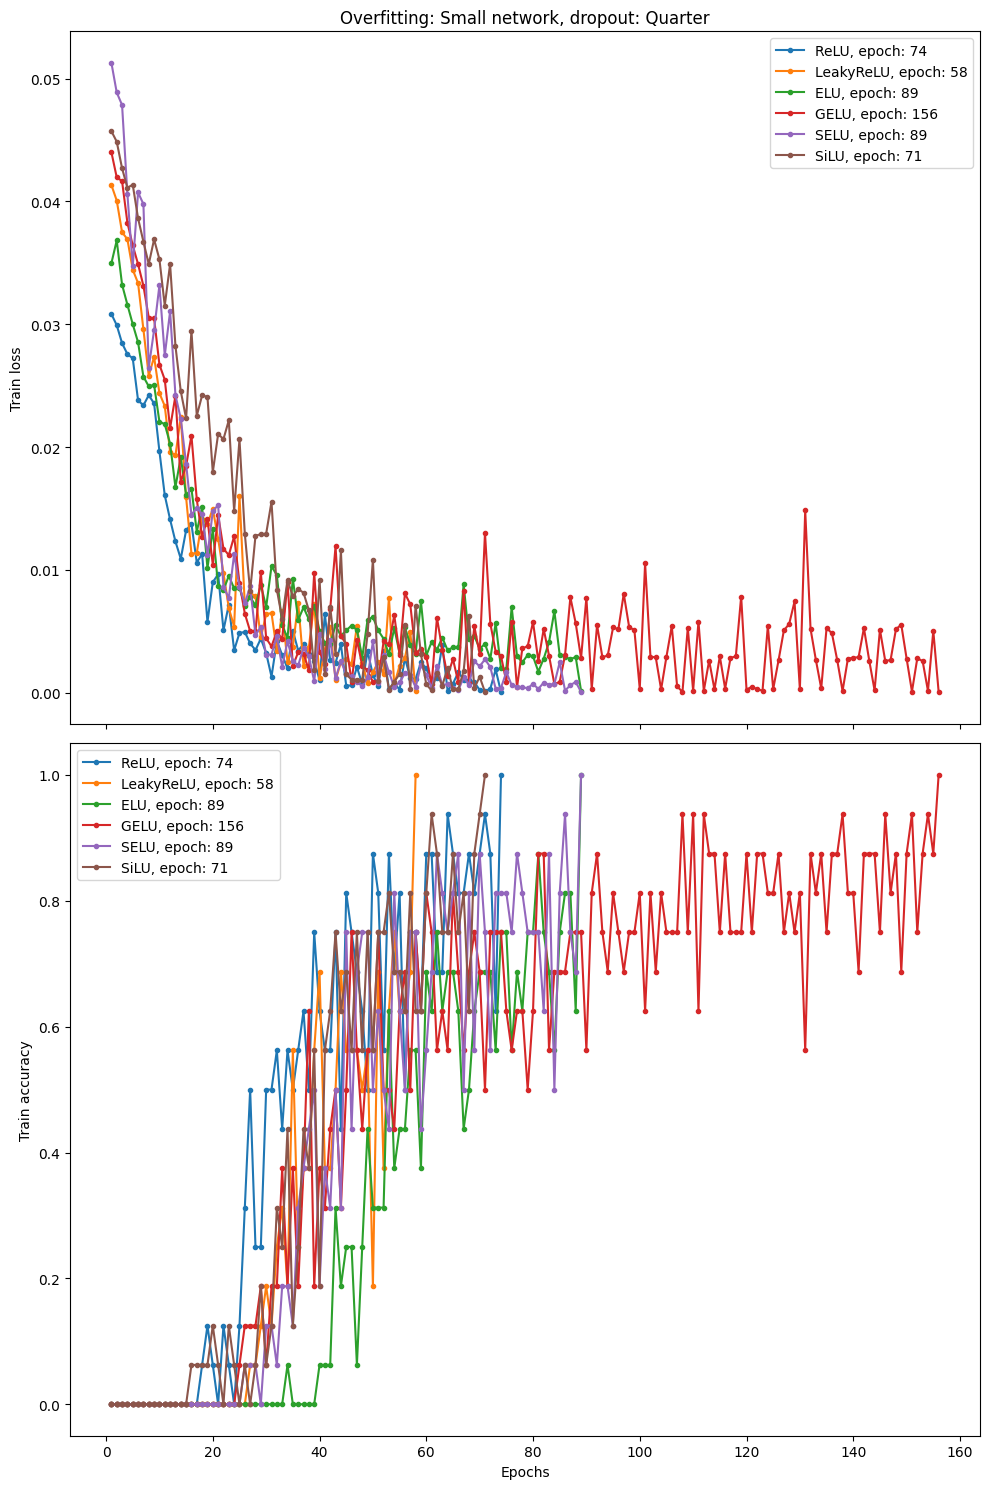

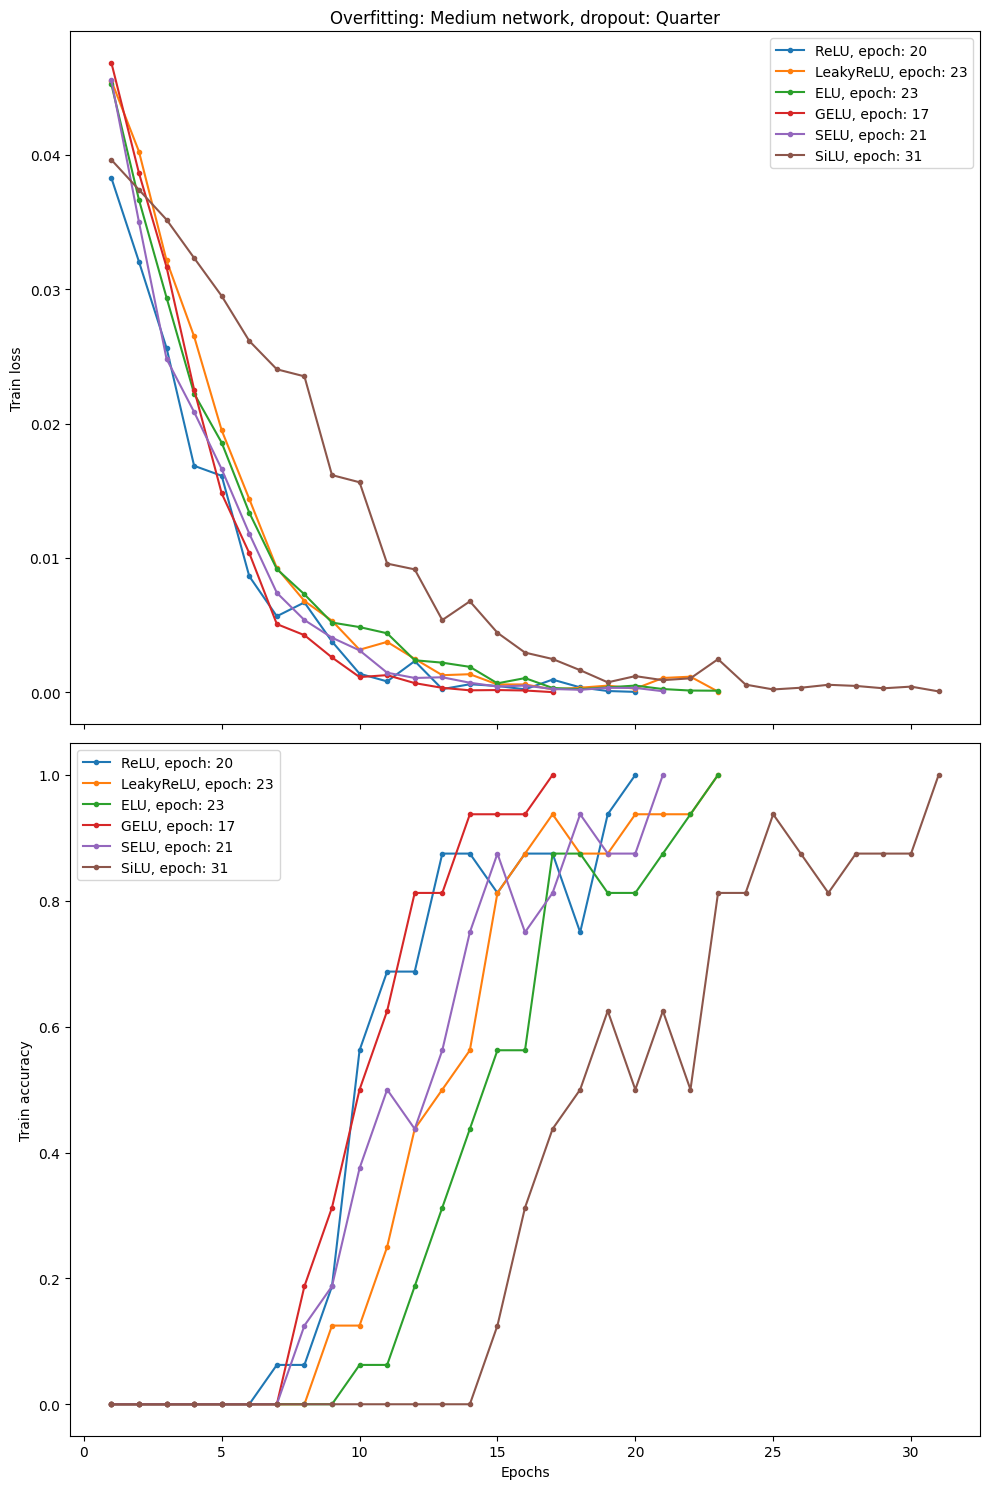

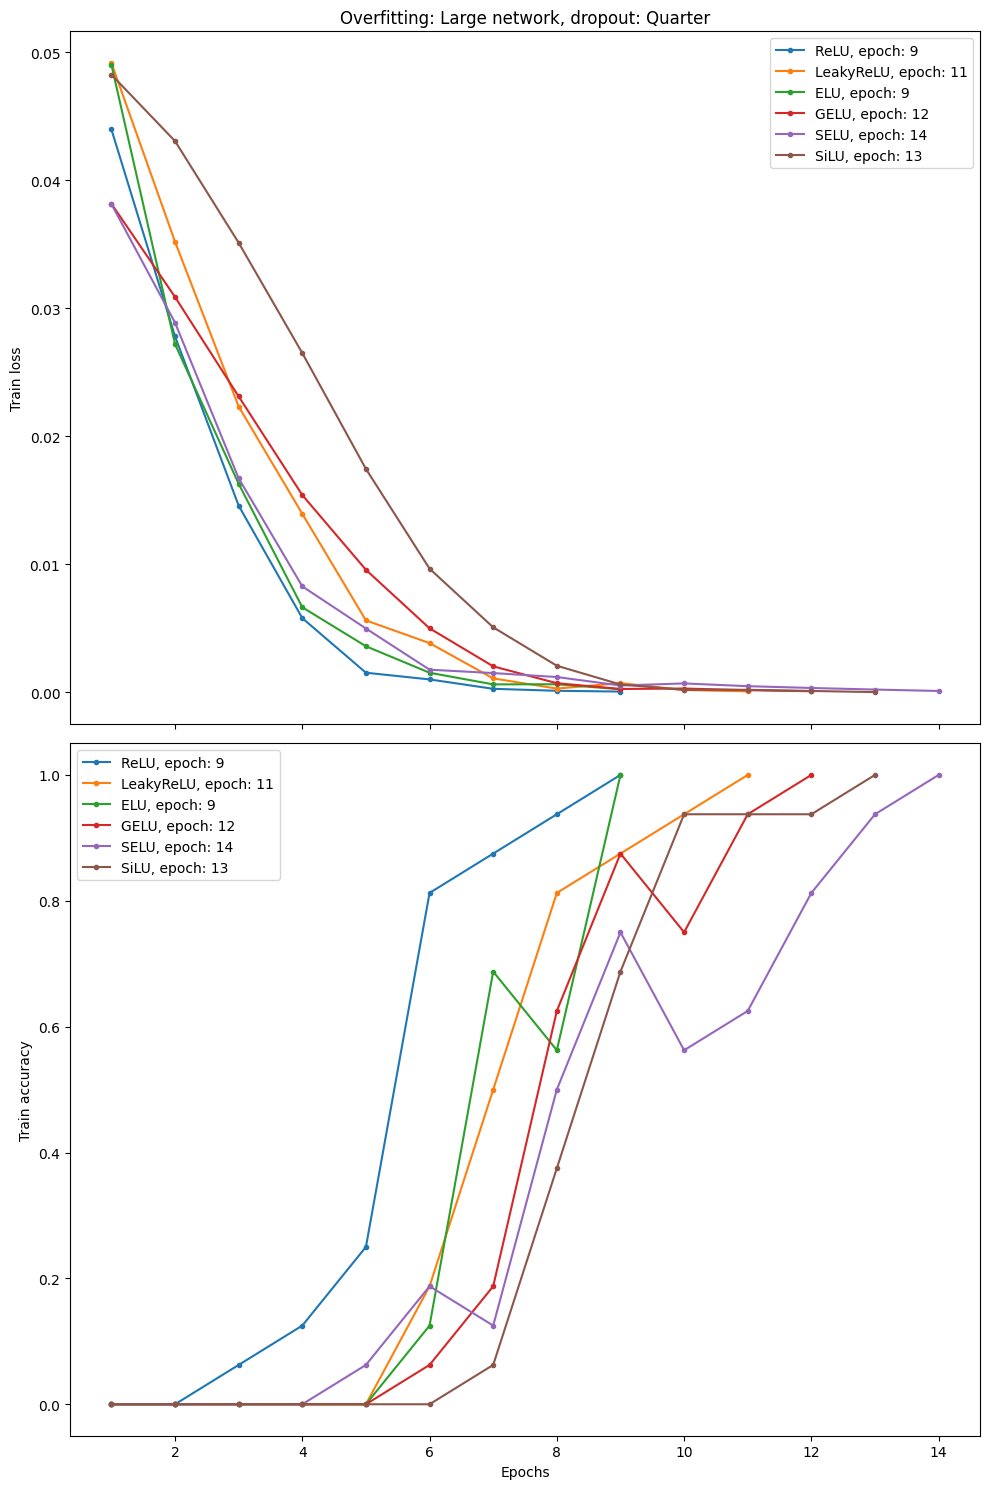

In [51]:
plot_overfitting_activations(activations, layer_param="small", dropout="quarter")
plot_overfitting_activations(activations, layer_param="medium", dropout="quarter")
plot_overfitting_activations(activations, layer_param="large", dropout="quarter")

## Varying dropout

#### Medium network

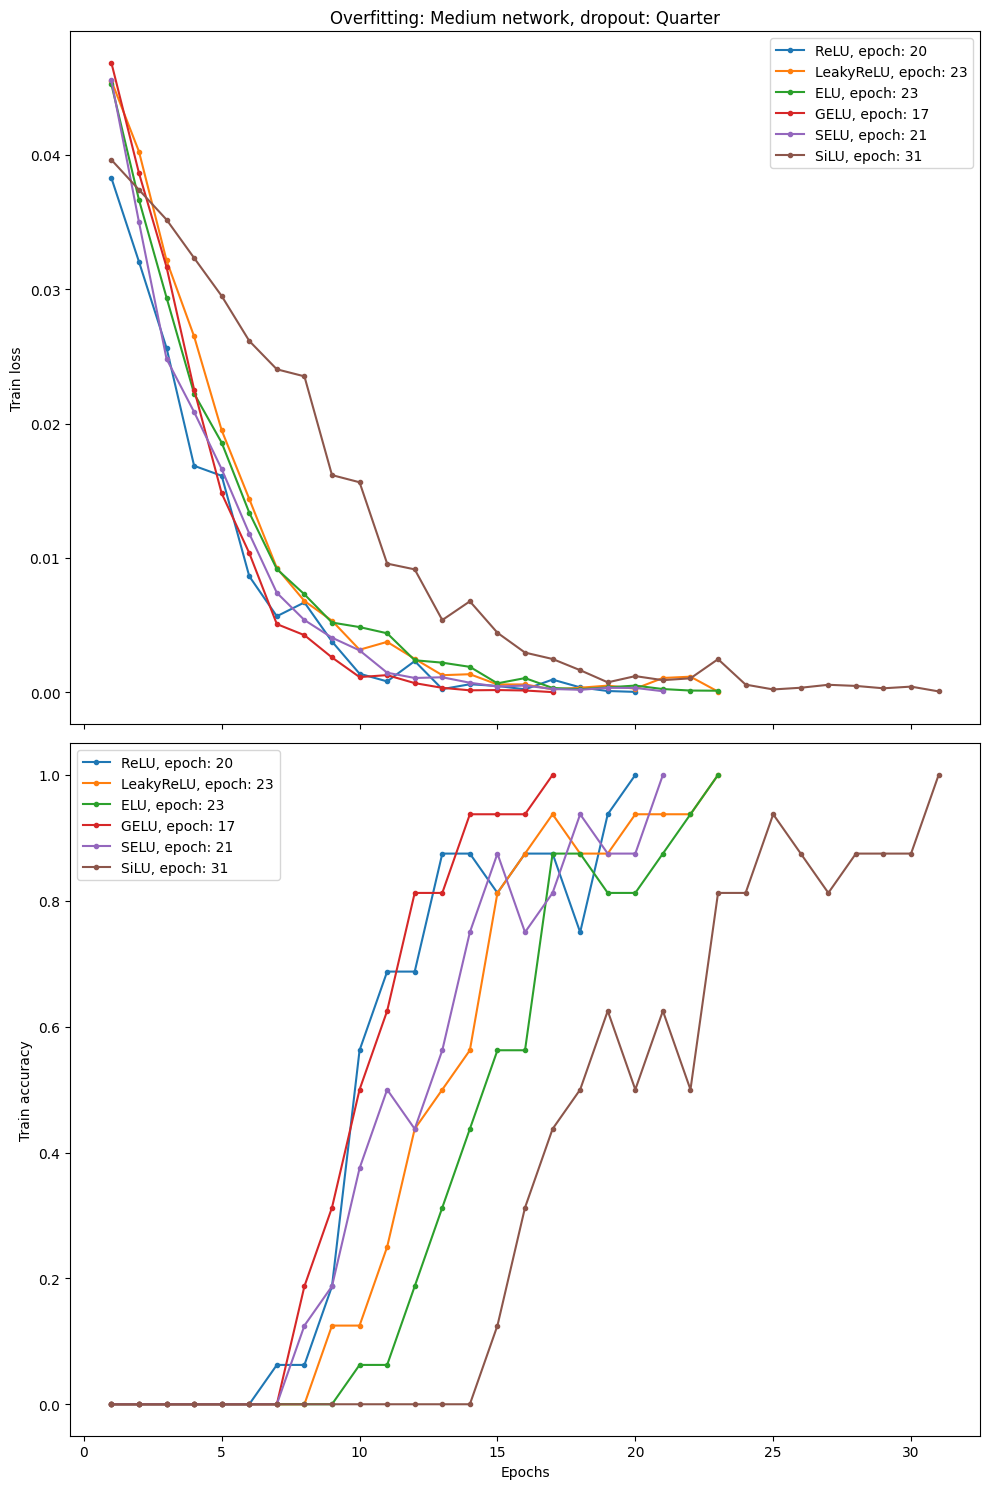

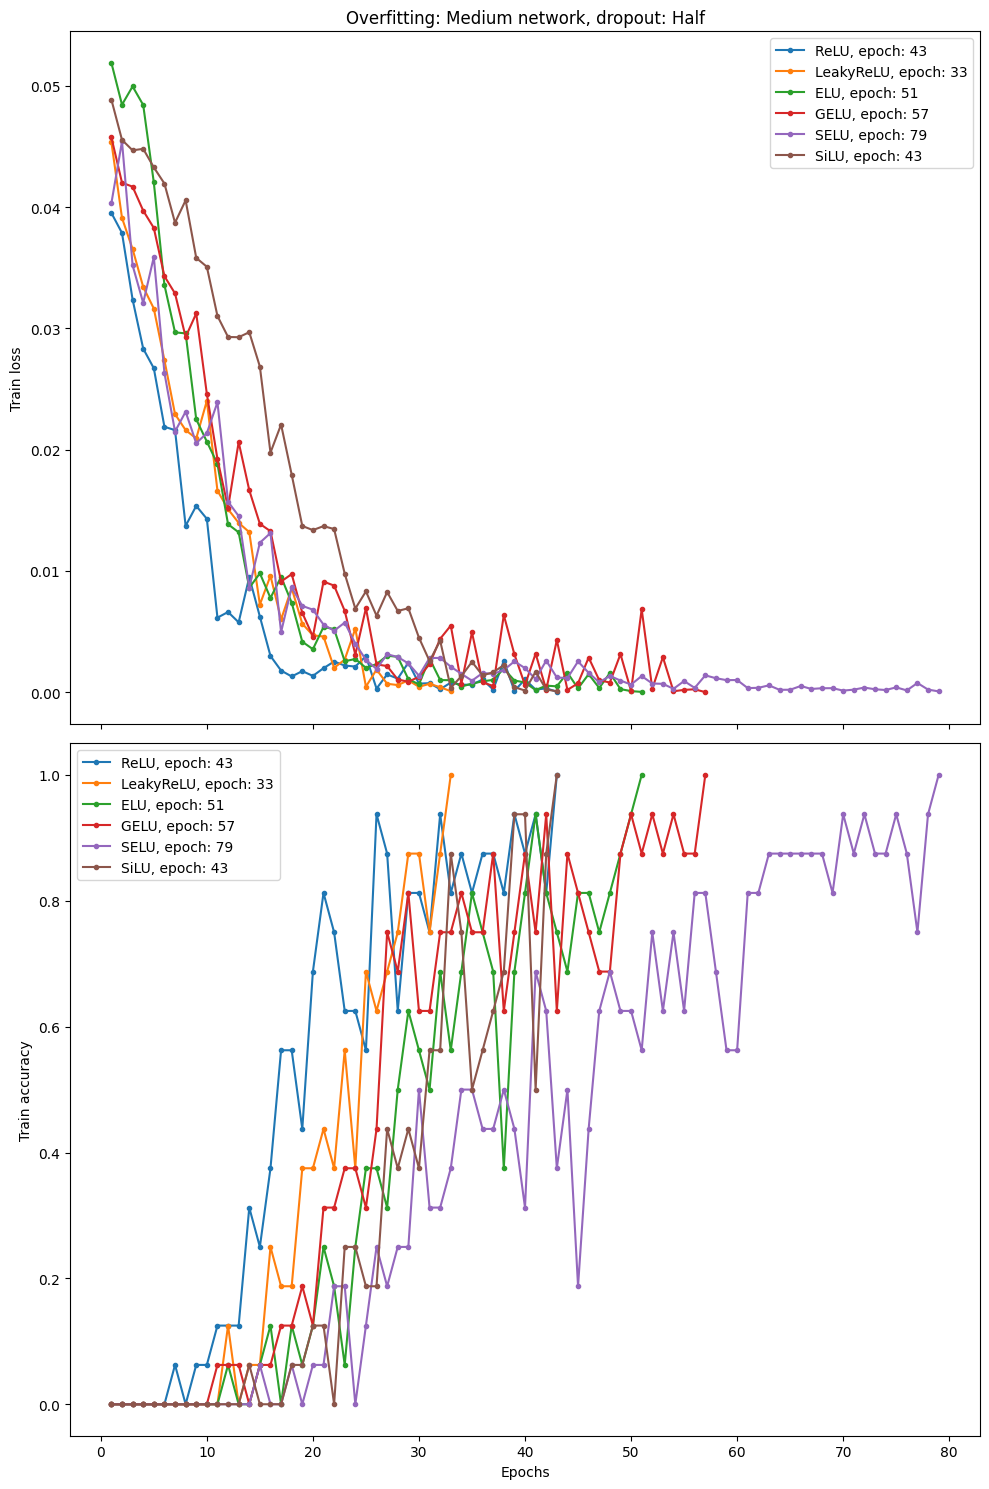

In [53]:
plot_overfitting_activations(activations, layer_param="medium", dropout="quarter")
plot_overfitting_activations(activations, layer_param="medium", dropout="half")


#### Large network

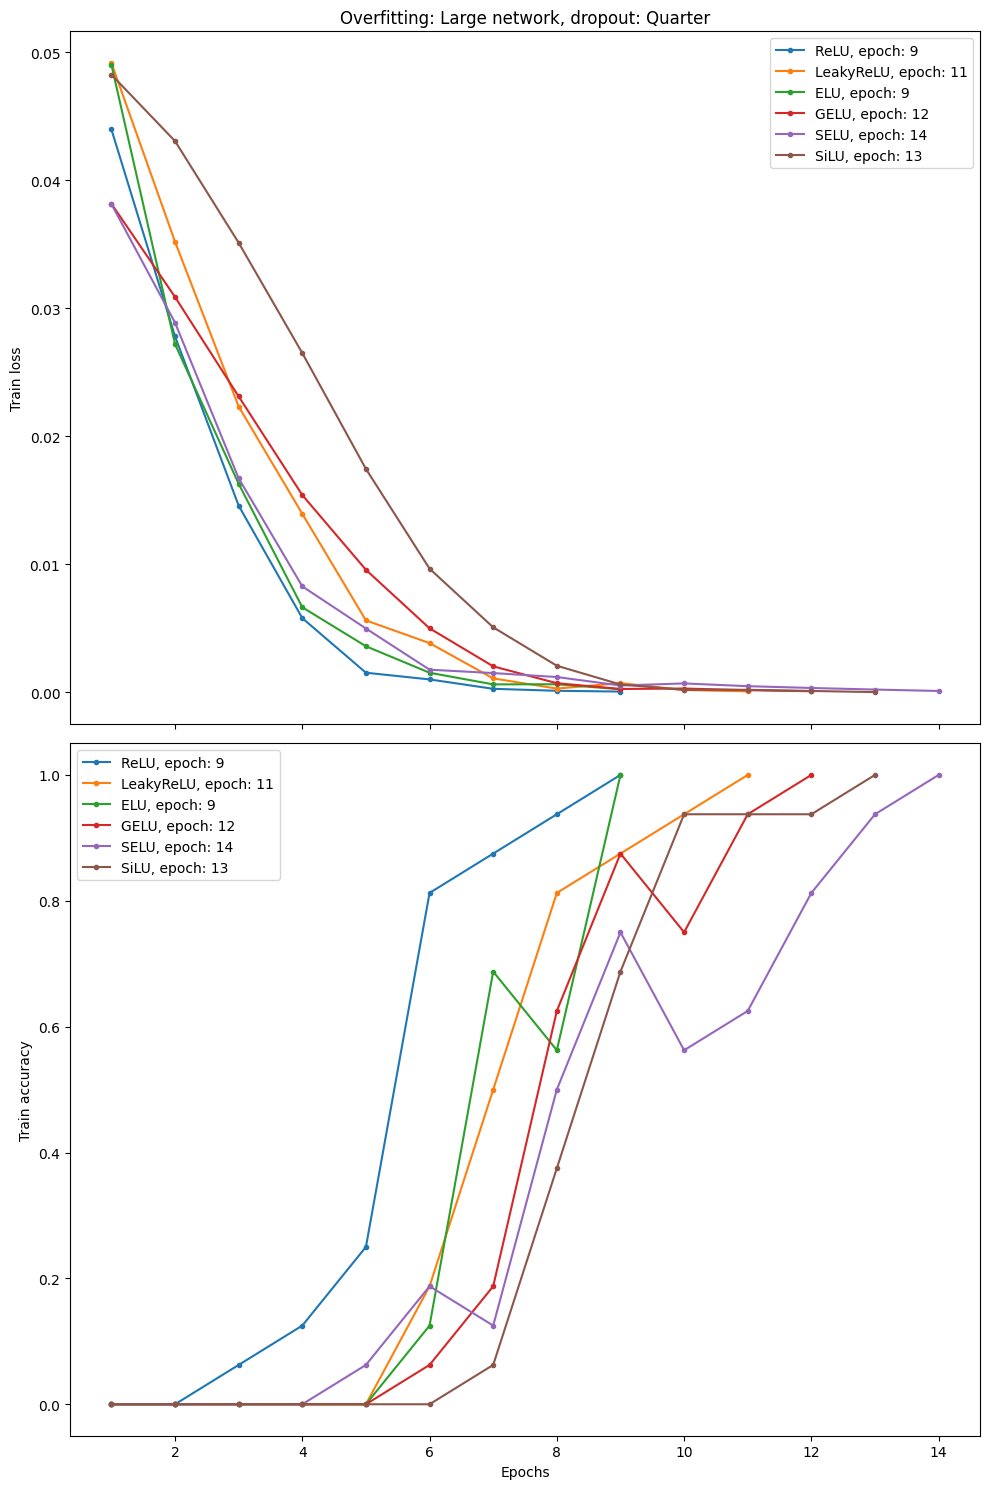

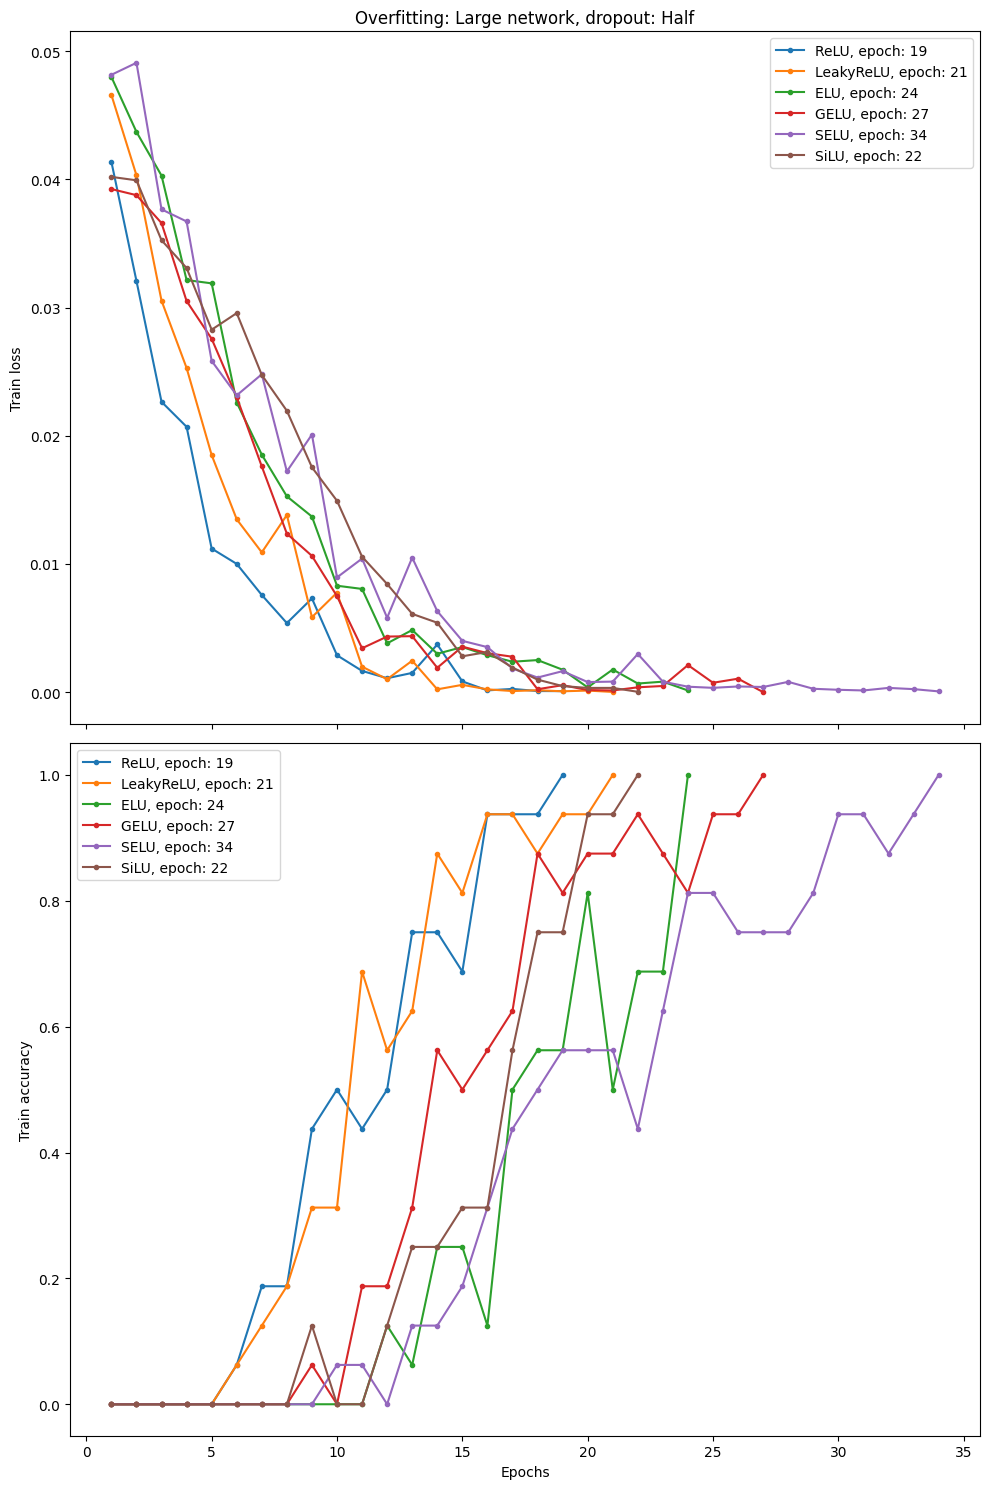

In [55]:
plot_overfitting_activations(activations, layer_param="large", dropout="quarter")
plot_overfitting_activations(activations, layer_param="large", dropout="half")

## Conclusion: use quarter dropout!